# Oil & Gas Industry -  Electrical Submersible Pumps

## Introduction

### In the oil and gas industry, electric submersible pump (ESP) systems are probably best known as an effective artificial lift method of pumping production fluids to the surface.

Electrical submersible pump (ESP) assemblies include the following:

<img src="images/image.jpg",width=444,height=200>


The electric motor has a rotatable rotor that is contained in a stationary stator. When the motor operates, the rotor rotates causing rotary vibrations of the ESP assembly to occur. 

ESPs are fitted with downhole monitoring units that transmit streams of data back to the surface.

For this project, I was asked to create a model that will predict the following triggers: UP, DOWN, and WARNING 

Failure of an ESP in a well can stop production or even lead to a dangerous event.

## Variable Descriptions



|    Columns | Description    |
|-------------|-------------|
    | well_id | Well Id (unit) |
    | field | 2 fields: SIRHAN & WEST SAFAWI (location) |
    | block | 7 blocks in field: 'A1', 'B1', 'C1', 'B2', 'C3', 'D1', 'D9' |
    | esp_sr_no | ESP Serial Number 001-031    |
    | vendor | Vendors: 1,2,3 (pump manufacturer)  |
    | depth  | depth of well in f.t. |
    | bean | ??  |
    | perf  | performance range (low - high)  |
    | date_install | Date the unit was intalled  |
    | water_cut | volume or % of water (daily flow says how profitable the well is)  |
    | daily_flow | Oil production in barrel/day  |
    | num_work_orders | # tickets of work orders generated for this device  |
    | avg_maintenance_cost_monthl | How much does it cost every month   |
    | status | 3 in total: Running - Warning - Down |
    | avg_uptime |  % of time ESP is running |
    | daily_production_variance  | difference between forecasted production volume and actual production volume  |
    | region | All wells are in the U.S.  |
    | time | hh:mm:ss  |
    | Ti_C | temp intake |
    | Pi_Psia | intake and discharge pressure |
    | Vx_g | pump vibration (radial) |
    | Vy_g | pump vibration (axial) |
    | Tm_C | motor temperature |
    | Mor_Ohm | motor resistance |
    | Lc_mA | motor current  |
    | Lv_V  | Leakage voltage |

#### Side notes
* **Pump Vibration** - It's necessary to be concerned about vibration because it has a major affect on the performance of your pump


## Import Libraries

In [1]:
%matplotlib inline


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context("notebook")



In [3]:
pwd

u'/home/sprmario/Data_Science_Work/GitHub_Repos/machine-learning/projects'

## Load Data

In [4]:
! head -3 ../../data/final.esp.csv

In [5]:
wells_df = pd.read_csv('../../data/final.esp.csv')

**Note**: In the command below I'm replacing '.' with '_'. Having a (.) will cause issues with column access due to Python being object orientied programming language. Everything is an object and you access an object's properties and methods with the dot (.)

In [6]:
wells_df.columns = [a.replace('.', '_') for a in wells_df.columns]

In [7]:
pd.set_option('display.max_columns', None) #This configuration allows me to see all the columns using .head() command
wells_df.head(5)

,well_id,field,block,esp_sr_no,vendor,depth,bean,perf,date_install,water_cut,daily_flow,num_work_orders,avg_maintenance_cost_monthly,status,avg_uptime,daily_production_variance,region,time,Ti_C,Pi_Psia,Vx_g,Vy_g,Tm_C,MOR_Ohm,Lc_mA,Lv_V
0,SS-A,SIRHAN,A1,ESP001,Vendor 1,2370,4.5,1895- 1997,1/10/1998,0.38,2500,5,5000.0,Warning,87,7,US,0:01:00,0.229064,22.226368,1533.026751,48.425831,0.845257,29.616,255,0.684238
1,SS-B,SIRHAN,B1,ESP002,Vendor 2,1740,4.5,1395- 1433,11/4/2005,0.34,2800,3,7000.0,Running,92,2,US,0:01:00,0.229064,22.226368,1533.026751,48.425831,0.845257,29.616,255,0.684238
2,SS-C101,SIRHAN,C1,ESP003,Vendor 1,1995,10.0,1427-1479,1/31/2003,0.40,3100,6,4000.0,Warning,94,0,US,0:01:00,0.229064,22.226368,1533.026751,48.425831,0.845257,29.616,255,0.684238
3,SS-C102,SIRHAN,A1,ESP004,Vendor 3,1790,5.0,1424-1480,9/7/2004,0.55,2100,3,6000.0,Running,78,16,US,0:01:00,0.229064,22.226368,1533.026751,48.425831,0.845257,29.616,255,0.684238
4,SS-C103,SIRHAN,B1,ESP005,Vendor 1,2140,10.0,1442 � 1492,4/11/2009,0.55,2400,5,5500.0,Warning,84,10,US,0:01:00,0.229064,22.226368,1533.026751,48.425831,0.845257,29.616,255,0.684238


In [8]:
wells_df.shape

(61938, 26)

** I want pandas to recognize date_install and time as DateTime **

In [9]:
wells_df.date_install.iloc[0]

'1/10/1998'

In [10]:
wells_df.date_install = pd.to_datetime(wells_df.date_install, infer_datetime_format=True) 
#Passing infer_datetime_format=True can often-times speedup a parsing when it's in a regular format (1/1/1990)

In [11]:
wells_df.date_install.iloc[0]

Timestamp('1998-01-10 00:00:00')

In [12]:
wells_df.time = pd.to_datetime(wells_df.time).dt.time
#wells_df.time = pd.to_timedelta(wells_df.time)

In [13]:
wells_df.time.iloc[0]

datetime.time(0, 1)

# Exploratory Data Analysis

Here we can see that the features are at different scales. I might consider rescaling the data before our modeling phase.

In [14]:
wells_df.describe()

,depth,bean,water_cut,daily_flow,num_work_orders,avg_maintenance_cost_monthly,avg_uptime,daily_production_variance,Ti_C,Pi_Psia,Vx_g,Vy_g,Tm_C,MOR_Ohm,Lc_mA,Lv_V
count,61938.000000,61938.000000,61938.000000,61938.000000,61938.000000,61938.000000,61938.000000,61938.000000,61738.000000,61938.000000,61938.000000,61938.000000,61938.000000,61938.000000,61938.0,61938.000000
mean,2062.903226,7.129032,0.440645,2587.096774,4.645161,5093.657238,87.161290,6.838710,0.366196,26.515130,1325.661698,21.431487,0.780924,28.523293,255.0,0.207660
std,221.356757,2.498303,0.089152,339.586866,1.357152,999.960881,5.702885,5.702885,0.197315,6.560580,215.956943,17.334089,0.071899,6.180058,0.0,1.347575
min,1740.000000,4.500000,0.340000,2100.000000,3.000000,3900.000000,78.000000,0.000000,0.000089,6.097965,578.001907,0.001170,0.515671,8.177126,255.0,-3.736072
25%,1890.000000,4.500000,0.380000,2400.000000,3.000000,4000.000000,84.000000,2.000000,0.220231,22.173026,1190.067453,8.662490,0.733333,24.397960,255.0,-0.701864
50%,2000.000000,6.000000,0.400000,2500.000000,5.000000,5000.000000,87.000000,7.000000,0.351580,26.403994,1320.878705,17.705261,0.781861,28.345175,255.0,0.212915
75%,2290.000000,10.000000,0.550000,2800.000000,6.000000,5500.000000,92.000000,10.000000,0.501477,31.277034,1472.532599,31.215787,0.827864,32.519657,255.0,1.082713
max,2370.000000,10.000000,0.550000,3100.000000,7.000000,15146.420270,94.000000,16.000000,1.147680,49.593279,1923.524250,195.680147,0.981339,46.659240,255.0,4.940575


Let's look at the classes. 

The classes are imbalanced so we're going to need to fix this by applying an over/under sampling technique before our modeling process 


In [15]:
wells_df.groupby(wells_df.status).size()

status
Down        4407
Running    51156
Warning     6375
dtype: int64

Here we can see normal distributions from the columns: 'Ti_C', 'Pi_Psia', 'Vx_g', 'Vy_g', 'Tm_C', 'MOR_Ohm', 'Lc_mA', 'Lv_V'

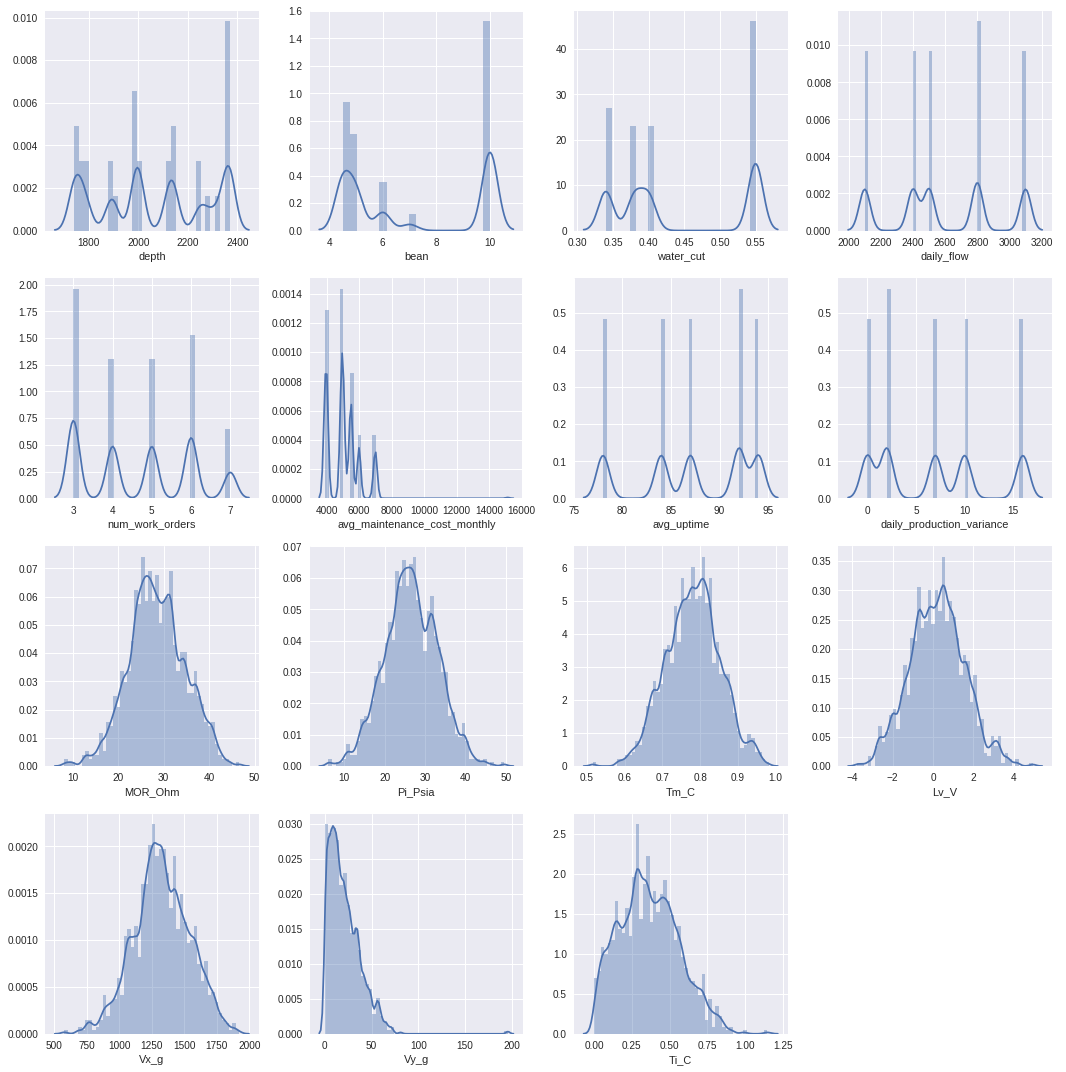

In [28]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(15,15))
sns.distplot(wells_df.depth, ax=axs[0,0])
sns.distplot(wells_df.bean, ax=axs[0,1])
sns.distplot(wells_df.water_cut, ax=axs[0,2])
sns.distplot(wells_df.daily_flow, ax=axs[0,3])
sns.distplot(wells_df.num_work_orders, ax=axs[1,0])
sns.distplot(wells_df.avg_maintenance_cost_monthly, ax=axs[1,1])
sns.distplot(wells_df.avg_uptime, ax=axs[1,2])
sns.distplot(wells_df.daily_production_variance, ax=axs[1,3])
sns.distplot(wells_df.MOR_Ohm, ax=axs[2,0])
sns.distplot(wells_df.Pi_Psia, ax=axs[2,1])
sns.distplot(wells_df.Tm_C,  ax=axs[2,2])
sns.distplot(wells_df.Lv_V,  ax=axs[2,3])
sns.distplot(wells_df.Vx_g,  ax=axs[3,0])
sns.distplot(wells_df.Vy_g,  ax=axs[3,1])
sns.distplot(wells_df.Ti_C,  ax=axs[3,2])
axs[-1, -1].axis('off')


fig.tight_layout()

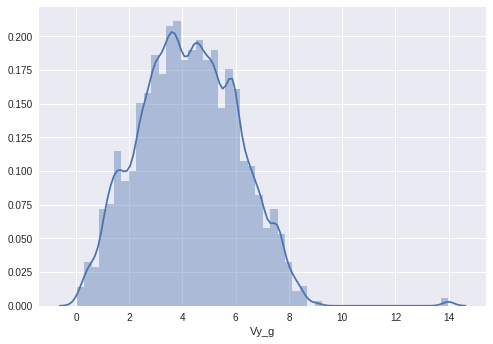

In [44]:
sns.distplot(np.sqrt(wells_df.Vy_g))

**Show total status triggers per sensor **

In [17]:
status_df = wells_df.groupby(['field','block','well_id','status']).count().esp_sr_no
status_df

field        block  well_id  status 
SIRHAN       A1     SS-A     Down        60
                             Running    790
                             Warning    149
                    SS-C102  Down       106
                             Running    793
                             Warning    100
                    SS-C109  Down        99
                             Running    800
                             Warning    100
                    SS-D     Down        64
                             Running    795
                             Warning    140
                    SS-D102  Down        96
                             Running    801
                             Warning    102
                    SS-D109  Down       109
                             Running    805
                             Warning     85
             B1     SS-B     Down        59
                             Running    888
                             Warning     52
                    SS-C103  Down      

In [18]:
status_df = status_df.unstack().reset_index()
status_df['total'] = status_df.Down + status_df.Running + status_df.Warning #adds 3 columns to get the total amount of triggers
status_count = status_df[['well_id','total','Running','Warning','Down']]
status_count.head()

status,well_id,total,Running,Warning,Down
0,SS-A,999,790,149,60
1,SS-C102,999,793,100,106
2,SS-C109,999,800,100,99
3,SS-D,999,795,140,64
4,SS-D102,999,801,102,96


#### Let's look at the sensors that had the most 'warning' triggers

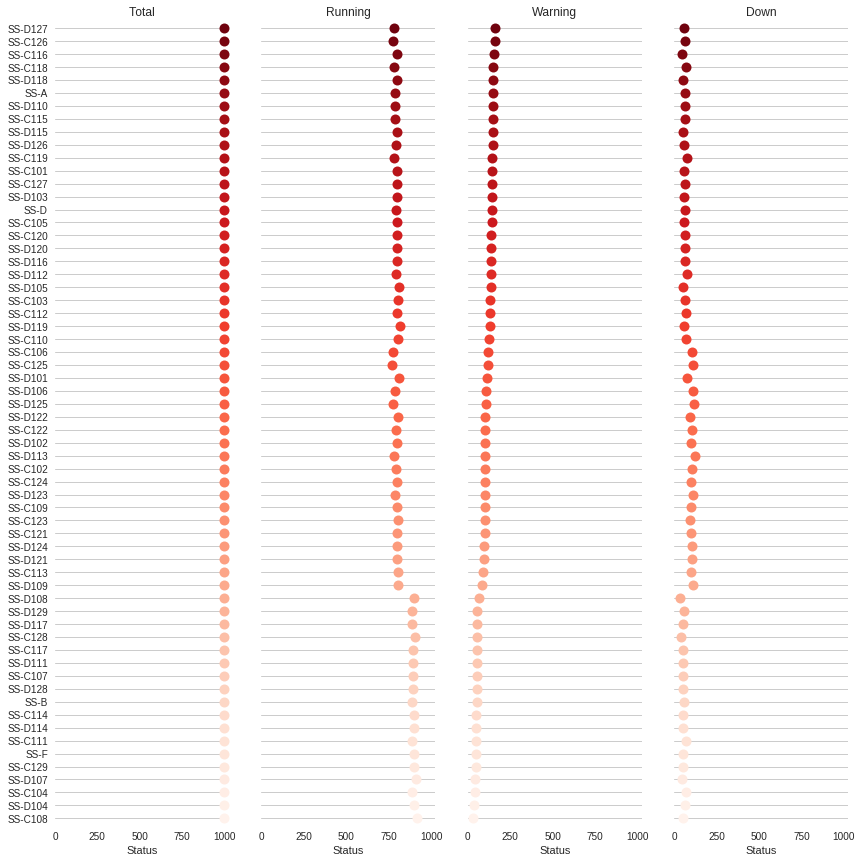

In [19]:
sns.set(style="whitegrid")


# Make the PairGrid
g = sns.PairGrid(status_count.sort_values(['Warning'], ascending=False),
                 x_vars=status_count.columns[1:], y_vars=["well_id"],
                 size=12, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h",
      palette="Reds_r", edgecolor="gray")

# Use the same x axis limits on all columns and add better labels
g.set(xlim=(0, 1025), xlabel="Status", ylabel="")

# Use semantically meaningful titles for the columns
titles = ["Total", "Running", "Warning",
          "Down"]

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

#### Let's look at the sensors that had the most 'down' triggers

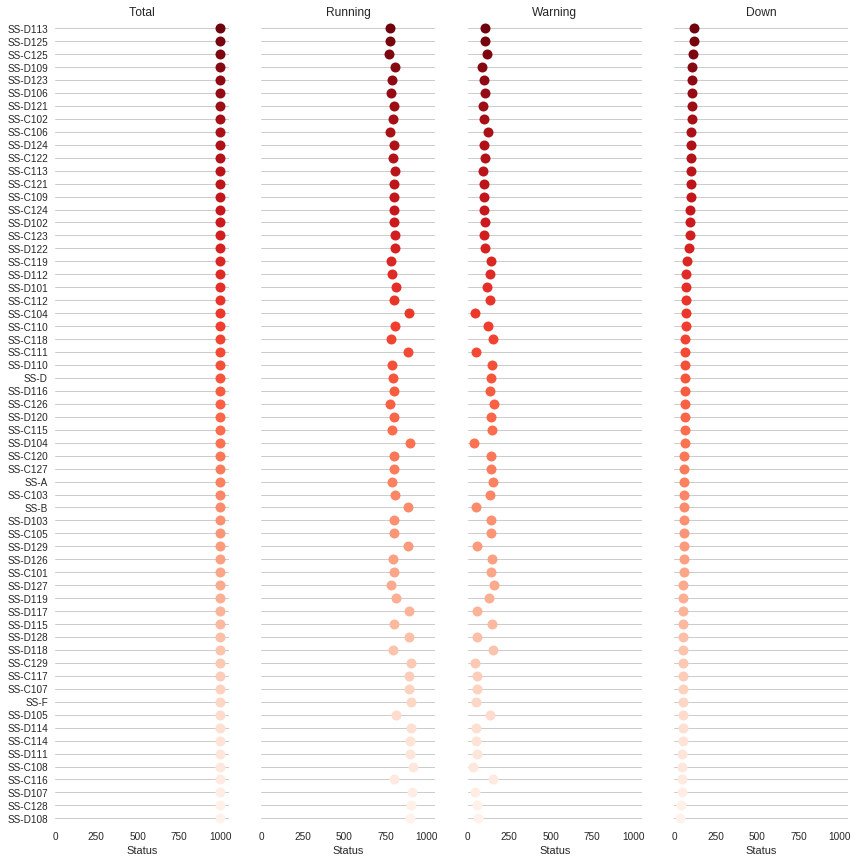

In [20]:
sns.set(style="whitegrid")


# Make the PairGrid
g = sns.PairGrid(status_count.sort_values(['Down'], ascending=False),
                 x_vars=status_count.columns[1:], y_vars=["well_id"],size=12, aspect=.25)
                 #size=25, aspect=.15)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h",
      palette="Reds_r", edgecolor="gray")

# Use the same x axis limits on all columns and add better labels
g.set(xlim=(0, 1050), xlabel="Status", ylabel="")

# Use semantically meaningful titles for the columns
titles = ["Total", "Running", "Warning",
          "Down"]

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

#### Let's look at the most problematic sensors.

Here I'll add warning and down for each sensor

In [21]:
status_count['Warning/Down'] = status_count.Warning + status_count.Down
status_count_comparison = status_count[['well_id','total','Warning/Down']]
status_count_comparison = status_count_comparison.sort_values("Warning/Down", ascending=False)
status_count_comparison.head()

/home/sprmario/Envs/testDSenv/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


status,well_id,total,Warning/Down
34,SS-C125,999,228
18,SS-C106,999,223
40,SS-C126,999,221
37,SS-D125,999,221
47,SS-D113,999,220


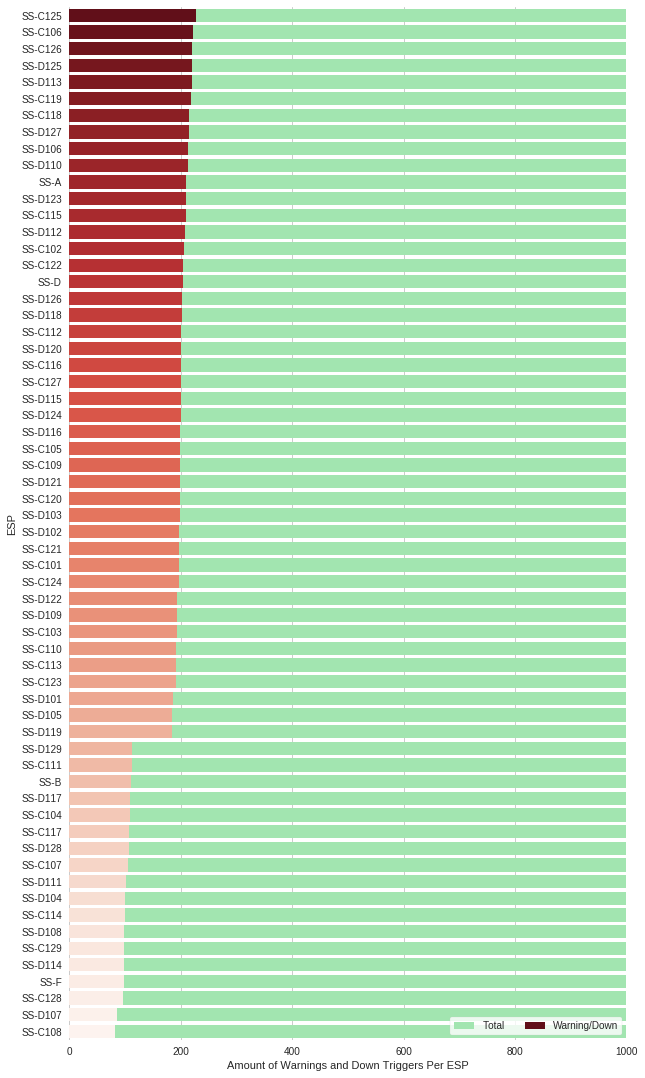

In [22]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 19))


# Plot the total number of alarms triggered '999'
sns.set_color_codes("pastel")
sns.barplot(x="total", y="well_id", data=status_count_comparison,
            label="Total", color="g")

# Plot the total of warnings and downs
#sns.set_color_codes("muted")
sns.barplot(x="Warning/Down", y="well_id", data=status_count_comparison,
            label="Warning/Down", palette="Reds_r")#color="r")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 1000), ylabel="ESP",
       xlabel="Amount of Warnings and Down Triggers Per ESP")
sns.despine(left=True, bottom=True)

** My next step is to dig deeper and check what is causing the alarms to go off. **

**Note:** Excessive vibration can cause the ESP to fail.

**Assumption:** The higher the radial and axial vibration (Vx_g,Vy_g) , the more 'warnings' and 'down' triggers there will be. 

In [23]:
print wells_df.Vx_g.mean()
print wells_df.Vy_g.mean() 

1325.66169807
21.4314870691


In [24]:
high_vibration_df = wells_df.loc[(wells_df.Vx_g > wells_df.Vx_g.mean()) & (wells_df.Vy_g > wells_df.Vy_g.mean())]
high_vibration_df = pd.DataFrame(high_vibration_df.groupby('status').well_id.count())
high_vibration_df = high_vibration_df.reset_index()

In [25]:
low_vibration_df = wells_df.loc[(wells_df.Vx_g < wells_df.Vx_g.mean()) & (wells_df.Vy_g < wells_df.Vy_g.mean())]
low_vibration_df = pd.DataFrame(low_vibration_df.groupby('status').well_id.count())
low_vibration_df = low_vibration_df.reset_index()

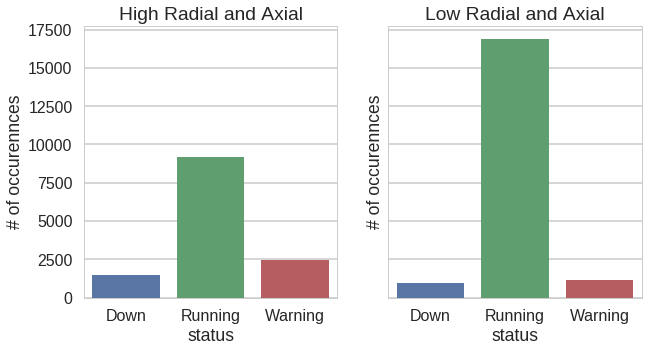

In [26]:
sns.set_context("poster")

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5), sharey='row')

high = sns.barplot(x='status', y='well_id', data= high_vibration_df, ax=axs[0])
high.set(ylabel='# of occurennces')
high.set_title('High Radial and Axial')
low = sns.barplot(x='status', y='well_id', data= low_vibration_df, ax=axs[1])
low.set(ylabel='# of occurennces')
low.set_title('Low Radial and Axial');


** The graph shows the number of times each status was triggered **
* Down and Warning messages doubled at high vibration

## Data Wrangling

**Check for nulls**

In [18]:
wells_df.isnull().sum() #handle nulls in region and Ti.C

well_id                           0
field                             0
block                             0
esp_sr_no                         0
vendor                            0
depth                             0
bean                              0
perf                              0
date_install                      0
water_cut                         0
daily_flow                        0
num_work_orders                   0
avg_maintenance_cost_monthly      0
status                            0
avg_uptime                        0
daily_production_variance         0
region                          100
time                              0
Ti_C                            200
Pi_Psia                           0
Vx_g                              0
Vy_g                              0
Tm_C                              0
MOR_Ohm                           0
Lc_mA                             0
Lv_V                              0
dtype: int64

### Filling region 'NA' with US
According to representatives all rows are in the same region 'US'

In [19]:
wells_df.region.unique()

array(['US', nan], dtype=object)

In [20]:
wells_df.region.fillna(value='US', inplace=True)

In [21]:
wells_df.region.isnull().sum()

0

### Using _forward fill_ for TI_C 'NA' values 
All top and bottom rows where NA exists have the same value

In [22]:
wells_df.Ti_C.isnull().sum()

200

In [23]:
wells_df.Ti_C

0        0.229064
1        0.229064
2        0.229064
3        0.229064
4        0.229064
5        0.229064
6        0.229064
7        0.229064
8        0.229064
9        0.229064
10       0.229064
11       0.229064
12       0.229064
13       0.229064
14       0.229064
15       0.229064
16       0.229064
17       0.229064
18       0.229064
19       0.229064
20       0.229064
21       0.229064
22       0.229064
23       0.229064
24       0.229064
25       0.229064
26       0.229064
27       0.229064
28       0.229064
29       0.229064
           ...   
61908    0.051769
61909    0.051769
61910    0.051769
61911    0.051769
61912    0.051769
61913    0.051769
61914    0.051769
61915    0.051769
61916    0.051769
61917    0.051769
61918    0.051769
61919         NaN
61920    0.051769
61921    0.051769
61922    0.051769
61923    0.051769
61924    0.051769
61925    0.051769
61926    0.051769
61927    0.051769
61928    0.051769
61929    0.051769
61930    0.051769
61931    0.051769
61932    0

In [24]:
wells_df.Ti_C.fillna(method='ffill', inplace=True)

In [25]:
wells_df.Ti_C.isnull().sum()

0

In [26]:
wells_df.isnull().sum()

well_id                         0
field                           0
block                           0
esp_sr_no                       0
vendor                          0
depth                           0
bean                            0
perf                            0
date_install                    0
water_cut                       0
daily_flow                      0
num_work_orders                 0
avg_maintenance_cost_monthly    0
status                          0
avg_uptime                      0
daily_production_variance       0
region                          0
time                            0
Ti_C                            0
Pi_Psia                         0
Vx_g                            0
Vy_g                            0
Tm_C                            0
MOR_Ohm                         0
Lc_mA                           0
Lv_V                            0
dtype: int64

## Checking for outliers

### Univariate variables

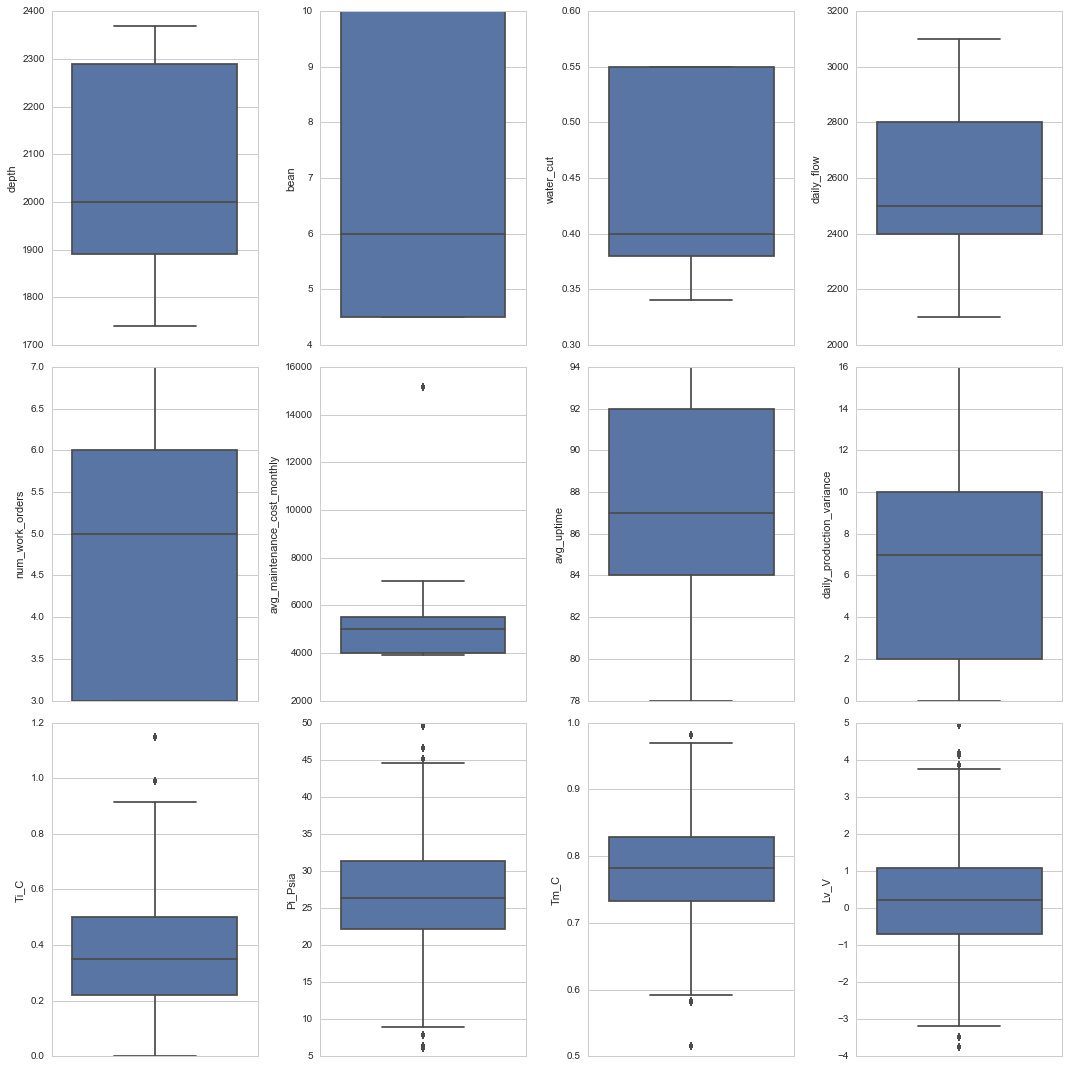

In [38]:
sns.set_context("notebook")
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(15,15))
sns.boxplot(wells_df.depth, orient='v', ax=axs[0,0])
sns.boxplot(wells_df.bean, orient='v', ax=axs[0,1])
sns.boxplot(wells_df.water_cut, orient='v', ax=axs[0,2])
sns.boxplot(wells_df.daily_flow, orient='v', ax=axs[0,3])
sns.boxplot(wells_df.num_work_orders, orient='v', ax=axs[1,0])
sns.boxplot(wells_df.avg_maintenance_cost_monthly, orient='v', ax=axs[1,1])
sns.boxplot(wells_df.avg_uptime, orient='v', ax=axs[1,2])
sns.boxplot(wells_df.daily_production_variance, orient='v', ax=axs[1,3])
sns.boxplot(wells_df.Ti_C, orient='v', ax=axs[2,0])
sns.boxplot(wells_df.Pi_Psia, orient='v', ax=axs[2,1])
sns.boxplot(wells_df.Tm_C, orient='v', ax=axs[2,2])
sns.boxplot(wells_df.Lv_V, orient='v', ax=axs[2,3])
fig.tight_layout()

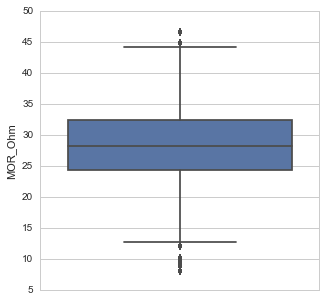

In [39]:
fig, axs = plt.subplots(figsize=(5,5))
sns.boxplot(wells_df.MOR_Ohm, orient='v')

### All outliers shown above are part of the dataset. I am classifying them as natural outliers and not measurement errors.

** avg_maintenance_cost_monthly ** - about 100 ESP's for each outlier

** Ti_C ** - about 60 EPS's for each outlier

** Pi_Psia ** - about 62 ESP's for each outlier

** Tm_C ** - about 62 ESP's for each outlier

** Lv_V ** - about 62 ESP's for each outlier

** MOR_Ohm ** - about 62 ESP's for each outlier

## Multivariate Variables

** About 100 ESP have a Vy_g measurement of 195.68. The measurements are part of dataset and I'm classifying them as natural outliers **

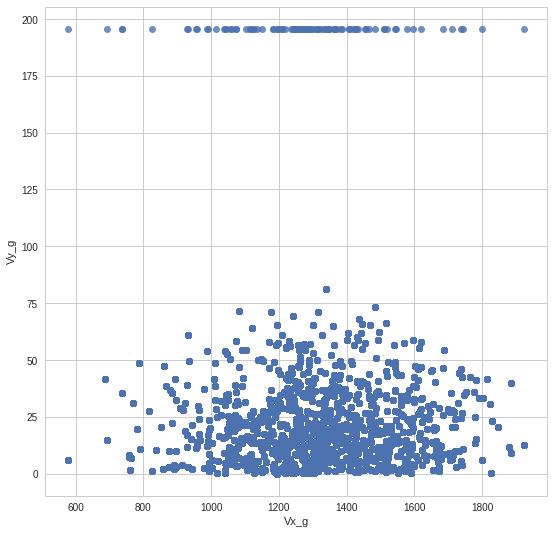

In [100]:
fig, axs = plt.subplots(figsize=(9,9))
sns.regplot(wells_df.Vx_g,wells_df.Vy_g, fit_reg=False);

## Data Transformations

**Adding esp_age to the dataframe**

Performed calculation to get the age of the ESP

Before calculating the age I want to check the oldest month and day in order to stay constant with all the ages. 

In this case the latest month and day is 11/04 so it safe to calculate the age drom the following date 11/21/2016

In [112]:
print wells_df.date_install.dt.month.max()
print wells_df.loc[(wells_df.date_install.dt.month==11) ].date_install.max()

11
2005-11-04 00:00:00


In [113]:
import datetime as DT

now = pd.Timestamp(DT.datetime(2016,11,21,0,0,0)) #date 11/21/2016 00:00:00  
wells_df['esp_age'] = (now - wells_df.date_install).astype('<m8[Y]')
wells_df['esp_age'] = wells_df['esp_age'].astype('int64')
wells_df.head()

,well_id,field,block,esp_sr_no,vendor,depth,bean,perf,date_install,water_cut,daily_flow,num_work_orders,avg_maintenance_cost_monthly,status,avg_uptime,daily_production_variance,region,time,Ti_C,Pi_Psia,Vx_g,Vy_g,Tm_C,MOR_Ohm,Lc_mA,Lv_V,esp_age
0,SS-A,SIRHAN,A1,ESP001,Vendor 1,2370,4.5,1895- 1997,1998-01-10,0.38,2500,5,5000.0,Warning,87,7,US,00:01:00,0.229064,22.226368,1533.026751,48.425831,0.845257,29.616,255,0.684238,18
1,SS-B,SIRHAN,B1,ESP002,Vendor 2,1740,4.5,1395- 1433,2005-11-04,0.34,2800,3,7000.0,Running,92,2,US,00:01:00,0.229064,22.226368,1533.026751,48.425831,0.845257,29.616,255,0.684238,11
2,SS-C101,SIRHAN,C1,ESP003,Vendor 1,1995,10.0,1427-1479,2003-01-31,0.40,3100,6,4000.0,Warning,94,0,US,00:01:00,0.229064,22.226368,1533.026751,48.425831,0.845257,29.616,255,0.684238,13
3,SS-C102,SIRHAN,A1,ESP004,Vendor 3,1790,5.0,1424-1480,2004-09-07,0.55,2100,3,6000.0,Running,78,16,US,00:01:00,0.229064,22.226368,1533.026751,48.425831,0.845257,29.616,255,0.684238,12
4,SS-C103,SIRHAN,B1,ESP005,Vendor 1,2140,10.0,1442 � 1492,2009-04-11,0.55,2400,5,5500.0,Warning,84,10,US,00:01:00,0.229064,22.226368,1533.026751,48.425831,0.845257,29.616,255,0.684238,7


In [114]:
wells_df.drop('date_install', axis=1, inplace = True) # dropping unnecessary columns

## Adding performance difference to the datafame
The performance label has two value *low-high*. I'm taking the difference from low and high 

In [115]:
wells_df.perf.unique()

array(['1895- 1997', '1395- 1433', '1427-1479', '1424-1480',
       '1442 \x96 1492', '1418-1470'], dtype=object)

In [116]:
wells_df['low_perf'] = wells_df['perf'].astype(str).str[:4] # gets the first 4 characters from perf
wells_df['high_perf'] = wells_df['perf'].astype(str).str[-4:] # gets the last 4 characters from perf

In [118]:
wells_df[['perf','low_perf','high_perf']]

,perf,low_perf,high_perf
0,1895- 1997,1895,1997
1,1395- 1433,1395,1433
2,1427-1479,1427,1479
3,1424-1480,1424,1480
4,1442 � 1492,1442,1492
5,1418-1470,1418,1470
6,1895- 1997,1895,1997
7,1395- 1433,1395,1433
8,1427-1479,1427,1479
9,1895- 1997,1895,1997


In [119]:
wells_df['perf_diff'] = wells_df.high_perf.astype(int) - wells_df.low_perf.astype(int)

In [120]:
wells_df[['perf','perf_diff']]

,perf,perf_diff
0,1895- 1997,102
1,1395- 1433,38
2,1427-1479,52
3,1424-1480,56
4,1442 � 1492,50
5,1418-1470,52
6,1895- 1997,102
7,1395- 1433,38
8,1427-1479,52
9,1895- 1997,102


In [121]:
columns = wells_df[['perf','low_perf','high_perf']]
wells_df.drop(columns, inplace=True, axis=1)

In [122]:
wells_df.head()

,well_id,field,block,esp_sr_no,vendor,depth,bean,water_cut,daily_flow,num_work_orders,avg_maintenance_cost_monthly,status,avg_uptime,daily_production_variance,region,time,Ti_C,Pi_Psia,Vx_g,Vy_g,Tm_C,MOR_Ohm,Lc_mA,Lv_V,esp_age,perf_diff
0,SS-A,SIRHAN,A1,ESP001,Vendor 1,2370,4.5,0.38,2500,5,5000.0,Warning,87,7,US,00:01:00,0.229064,22.226368,1533.026751,48.425831,0.845257,29.616,255,0.684238,18,102
1,SS-B,SIRHAN,B1,ESP002,Vendor 2,1740,4.5,0.34,2800,3,7000.0,Running,92,2,US,00:01:00,0.229064,22.226368,1533.026751,48.425831,0.845257,29.616,255,0.684238,11,38
2,SS-C101,SIRHAN,C1,ESP003,Vendor 1,1995,10.0,0.40,3100,6,4000.0,Warning,94,0,US,00:01:00,0.229064,22.226368,1533.026751,48.425831,0.845257,29.616,255,0.684238,13,52
3,SS-C102,SIRHAN,A1,ESP004,Vendor 3,1790,5.0,0.55,2100,3,6000.0,Running,78,16,US,00:01:00,0.229064,22.226368,1533.026751,48.425831,0.845257,29.616,255,0.684238,12,56
4,SS-C103,SIRHAN,B1,ESP005,Vendor 1,2140,10.0,0.55,2400,5,5500.0,Warning,84,10,US,00:01:00,0.229064,22.226368,1533.026751,48.425831,0.845257,29.616,255,0.684238,7,50


## Adding dummies to the dataframe

** Use the function get_dummies for Field and Vendor

We can assume that one field might be in better conditions than the other

We can also assume that some vendors might manufacture ESP's with greater quality

*I'm ignoring block because both fields have blocks with the same name (ex. Sirhan and West Safawi both have blocks named 'A1', 'B1', 'C1', 'B2', 'C3', 'D1', 'D9')

In [123]:
for column in ['field', 'vendor']:
    dummies = pd.get_dummies(wells_df[column])
    wells_df[dummies.columns] = dummies

In [124]:
wells_df.head(5)

,well_id,field,block,esp_sr_no,vendor,depth,bean,water_cut,daily_flow,num_work_orders,avg_maintenance_cost_monthly,status,avg_uptime,daily_production_variance,region,time,Ti_C,Pi_Psia,Vx_g,Vy_g,Tm_C,MOR_Ohm,Lc_mA,Lv_V,esp_age,perf_diff,SIRHAN,WEST SAFAWI,Vendor 1,Vendor 2,Vendor 3
0,SS-A,SIRHAN,A1,ESP001,Vendor 1,2370,4.5,0.38,2500,5,5000.0,Warning,87,7,US,00:01:00,0.229064,22.226368,1533.026751,48.425831,0.845257,29.616,255,0.684238,18,102,1,0,1,0,0
1,SS-B,SIRHAN,B1,ESP002,Vendor 2,1740,4.5,0.34,2800,3,7000.0,Running,92,2,US,00:01:00,0.229064,22.226368,1533.026751,48.425831,0.845257,29.616,255,0.684238,11,38,1,0,0,1,0
2,SS-C101,SIRHAN,C1,ESP003,Vendor 1,1995,10.0,0.40,3100,6,4000.0,Warning,94,0,US,00:01:00,0.229064,22.226368,1533.026751,48.425831,0.845257,29.616,255,0.684238,13,52,1,0,1,0,0
3,SS-C102,SIRHAN,A1,ESP004,Vendor 3,1790,5.0,0.55,2100,3,6000.0,Running,78,16,US,00:01:00,0.229064,22.226368,1533.026751,48.425831,0.845257,29.616,255,0.684238,12,56,1,0,0,0,1
4,SS-C103,SIRHAN,B1,ESP005,Vendor 1,2140,10.0,0.55,2400,5,5500.0,Warning,84,10,US,00:01:00,0.229064,22.226368,1533.026751,48.425831,0.845257,29.616,255,0.684238,7,50,1,0,1,0,0


In [125]:
cols = wells_df[['field','vendor']]
wells_df.drop(cols,inplace=True,axis=1)

In [126]:
wells_df.head()

,well_id,block,esp_sr_no,depth,bean,water_cut,daily_flow,num_work_orders,avg_maintenance_cost_monthly,status,avg_uptime,daily_production_variance,region,time,Ti_C,Pi_Psia,Vx_g,Vy_g,Tm_C,MOR_Ohm,Lc_mA,Lv_V,esp_age,perf_diff,SIRHAN,WEST SAFAWI,Vendor 1,Vendor 2,Vendor 3
0,SS-A,A1,ESP001,2370,4.5,0.38,2500,5,5000.0,Warning,87,7,US,00:01:00,0.229064,22.226368,1533.026751,48.425831,0.845257,29.616,255,0.684238,18,102,1,0,1,0,0
1,SS-B,B1,ESP002,1740,4.5,0.34,2800,3,7000.0,Running,92,2,US,00:01:00,0.229064,22.226368,1533.026751,48.425831,0.845257,29.616,255,0.684238,11,38,1,0,0,1,0
2,SS-C101,C1,ESP003,1995,10.0,0.40,3100,6,4000.0,Warning,94,0,US,00:01:00,0.229064,22.226368,1533.026751,48.425831,0.845257,29.616,255,0.684238,13,52,1,0,1,0,0
3,SS-C102,A1,ESP004,1790,5.0,0.55,2100,3,6000.0,Running,78,16,US,00:01:00,0.229064,22.226368,1533.026751,48.425831,0.845257,29.616,255,0.684238,12,56,1,0,0,0,1
4,SS-C103,B1,ESP005,2140,10.0,0.55,2400,5,5500.0,Warning,84,10,US,00:01:00,0.229064,22.226368,1533.026751,48.425831,0.845257,29.616,255,0.684238,7,50,1,0,1,0,0


## Create two columns with encoders for 'status'

#### Two_labels column for Logistic Regression model and Random Forest

#### Three_labels column for Multiclass Classification

**Adding status_binary to the dataframe**

In order to create a model we need to label Running as 1 and Down/Warning as 0

In [127]:
wells_df['two_labels'] =wells_df.status.map({'Down':0, 'Warning':0, 'Running':1})
#wells_df.status_binary = wells_df.status_binary.astype('int64')
wells_df.head()

,well_id,block,esp_sr_no,depth,bean,water_cut,daily_flow,num_work_orders,avg_maintenance_cost_monthly,status,avg_uptime,daily_production_variance,region,time,Ti_C,Pi_Psia,Vx_g,Vy_g,Tm_C,MOR_Ohm,Lc_mA,Lv_V,esp_age,perf_diff,SIRHAN,WEST SAFAWI,Vendor 1,Vendor 2,Vendor 3,two_labels
0,SS-A,A1,ESP001,2370,4.5,0.38,2500,5,5000.0,Warning,87,7,US,00:01:00,0.229064,22.226368,1533.026751,48.425831,0.845257,29.616,255,0.684238,18,102,1,0,1,0,0,0
1,SS-B,B1,ESP002,1740,4.5,0.34,2800,3,7000.0,Running,92,2,US,00:01:00,0.229064,22.226368,1533.026751,48.425831,0.845257,29.616,255,0.684238,11,38,1,0,0,1,0,1
2,SS-C101,C1,ESP003,1995,10.0,0.40,3100,6,4000.0,Warning,94,0,US,00:01:00,0.229064,22.226368,1533.026751,48.425831,0.845257,29.616,255,0.684238,13,52,1,0,1,0,0,0
3,SS-C102,A1,ESP004,1790,5.0,0.55,2100,3,6000.0,Running,78,16,US,00:01:00,0.229064,22.226368,1533.026751,48.425831,0.845257,29.616,255,0.684238,12,56,1,0,0,0,1,1
4,SS-C103,B1,ESP005,2140,10.0,0.55,2400,5,5500.0,Warning,84,10,US,00:01:00,0.229064,22.226368,1533.026751,48.425831,0.845257,29.616,255,0.684238,7,50,1,0,1,0,0,0


In [128]:
wells_df['three_labels'] =wells_df.status.map({'Down':0, 'Warning':1, 'Running':2})
#wells_df.status_binary = wells_df.status_binary.astype('int64')
wells_df.head()

,well_id,block,esp_sr_no,depth,bean,water_cut,daily_flow,num_work_orders,avg_maintenance_cost_monthly,status,avg_uptime,daily_production_variance,region,time,Ti_C,Pi_Psia,Vx_g,Vy_g,Tm_C,MOR_Ohm,Lc_mA,Lv_V,esp_age,perf_diff,SIRHAN,WEST SAFAWI,Vendor 1,Vendor 2,Vendor 3,two_labels,three_labels
0,SS-A,A1,ESP001,2370,4.5,0.38,2500,5,5000.0,Warning,87,7,US,00:01:00,0.229064,22.226368,1533.026751,48.425831,0.845257,29.616,255,0.684238,18,102,1,0,1,0,0,0,1
1,SS-B,B1,ESP002,1740,4.5,0.34,2800,3,7000.0,Running,92,2,US,00:01:00,0.229064,22.226368,1533.026751,48.425831,0.845257,29.616,255,0.684238,11,38,1,0,0,1,0,1,2
2,SS-C101,C1,ESP003,1995,10.0,0.40,3100,6,4000.0,Warning,94,0,US,00:01:00,0.229064,22.226368,1533.026751,48.425831,0.845257,29.616,255,0.684238,13,52,1,0,1,0,0,0,1
3,SS-C102,A1,ESP004,1790,5.0,0.55,2100,3,6000.0,Running,78,16,US,00:01:00,0.229064,22.226368,1533.026751,48.425831,0.845257,29.616,255,0.684238,12,56,1,0,0,0,1,1,2
4,SS-C103,B1,ESP005,2140,10.0,0.55,2400,5,5500.0,Warning,84,10,US,00:01:00,0.229064,22.226368,1533.026751,48.425831,0.845257,29.616,255,0.684238,7,50,1,0,1,0,0,0,1


In [129]:
wells_df = wells_df[['well_id','SIRHAN','WEST SAFAWI','Vendor 1','Vendor 2', 'Vendor 3','block','esp_sr_no','perf_diff','depth','bean',
                     'esp_age','water_cut','daily_flow','num_work_orders','avg_maintenance_cost_monthly','status','two_labels',
                     'three_labels','avg_uptime','daily_production_variance','region','time','Ti_C','Pi_Psia','Vx_g',
                     'Vy_g','Tm_C','MOR_Ohm','Lc_mA','Lv_V']]
wells_df.head()

,well_id,SIRHAN,WEST SAFAWI,Vendor 1,Vendor 2,Vendor 3,block,esp_sr_no,perf_diff,depth,bean,esp_age,water_cut,daily_flow,num_work_orders,avg_maintenance_cost_monthly,status,two_labels,three_labels,avg_uptime,daily_production_variance,region,time,Ti_C,Pi_Psia,Vx_g,Vy_g,Tm_C,MOR_Ohm,Lc_mA,Lv_V
0,SS-A,1,0,1,0,0,A1,ESP001,102,2370,4.5,18,0.38,2500,5,5000.0,Warning,0,1,87,7,US,00:01:00,0.229064,22.226368,1533.026751,48.425831,0.845257,29.616,255,0.684238
1,SS-B,1,0,0,1,0,B1,ESP002,38,1740,4.5,11,0.34,2800,3,7000.0,Running,1,2,92,2,US,00:01:00,0.229064,22.226368,1533.026751,48.425831,0.845257,29.616,255,0.684238
2,SS-C101,1,0,1,0,0,C1,ESP003,52,1995,10.0,13,0.40,3100,6,4000.0,Warning,0,1,94,0,US,00:01:00,0.229064,22.226368,1533.026751,48.425831,0.845257,29.616,255,0.684238
3,SS-C102,1,0,0,0,1,A1,ESP004,56,1790,5.0,12,0.55,2100,3,6000.0,Running,1,2,78,16,US,00:01:00,0.229064,22.226368,1533.026751,48.425831,0.845257,29.616,255,0.684238
4,SS-C103,1,0,1,0,0,B1,ESP005,50,2140,10.0,7,0.55,2400,5,5500.0,Warning,0,1,84,10,US,00:01:00,0.229064,22.226368,1533.026751,48.425831,0.845257,29.616,255,0.684238


## Savind the dataframe as a CSV for further analysis in R

In [58]:
#wells_df.to_csv('final_esp_v1.0.csv', sep=',' )

# LOGISTIC REGRESSION MODEL

### Split Test and Train data 

In [130]:
feature_cols = ['SIRHAN','WEST SAFAWI','perf_diff','depth','bean','esp_age','Vendor 1','Vendor 2', 'Vendor 3',
                         'water_cut','daily_flow','num_work_orders','avg_maintenance_cost_monthly','avg_uptime',
                        'daily_production_variance','Ti_C','Pi_Psia','Vx_g','Vy_g','Tm_C','MOR_Ohm','Lc_mA','Lv_V']
X = wells_df[feature_cols]
y = wells_df.two_labels #{Down:0, Warning:0, Running:1}

In [131]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=.2)

/home/sprmario/Envs/testDSenv/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [132]:
print wells_df.shape
print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape

(61938, 31)
(49550, 23)
(12388, 23)
(49550,)
(12388,)


### Scaling data with outliers

Making sure that each Feature has approximately the same scale can be a crucial preprocessing step.

When there's outliers, it is best practice to use a scaler that is robust against outliers

In [133]:
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()

In [134]:
X_tr_r = robust_scaler.fit_transform(X_train)
X_te_r = robust_scaler.transform(X_test)

In [135]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight='balanced', n_jobs=5 , random_state=1)
logreg.fit(X_tr_r, y_train)#

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=5, penalty='l2', random_state=1,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [136]:
well_feat = pd.Series(index=X_train.columns, data=logreg.coef_.reshape(-1))
well_feat.sort_values(ascending=False)

Vendor 2                        0.555076
bean                            0.059822
depth                           0.030097
SIRHAN                          0.025931
Tm_C                            0.013623
Pi_Psia                         0.010799
Vendor 1                        0.010714
Ti_C                            0.007146
water_cut                       0.005169
daily_production_variance       0.001136
Lc_mA                           0.000000
avg_uptime                     -0.001136
avg_maintenance_cost_monthly   -0.002744
perf_diff                      -0.004090
num_work_orders                -0.005141
daily_flow                     -0.017645
esp_age                        -0.019141
Lv_V                           -0.019445
MOR_Ohm                        -0.021171
WEST SAFAWI                    -0.025931
Vx_g                           -0.219219
Vendor 3                       -0.346759
Vy_g                           -0.859023
dtype: float64

#### How do we interpret the coefficients? 
Vx_g, Vy_g, Vendor 3 have a greater impact in predicting an ESP Down/Warning

Vendor 2, bean, depth have a greater impact in predicting an ESP Running

In [137]:
y_pred_class = logreg.predict(X_te_r)
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred_class) 

0.682434614143


Due to our classes being imbalanced, we couldn’t rely on the model with the best classification accuracy

In [138]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[1367,  789],
       [3145, 7087]])

In [139]:
pd.crosstab(y_test, y_pred_class, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,1367,789,2156
1,3145,7087,10232
All,4512,7876,12388


#### Meauring the sensitivity and specifity

Sensitivity is the measure used to report how effective a test is in identifying an ESP **running** status. The higher the sensitivity the better.

Specificity is the measure used to report how effective a test is in identifying an ESP **warning/down** status. The higher the specificity the better.

In [140]:
sensitivity = (7087/10232.) * 100 #TP/(TP + FN))
print sensitivity
specificity = (1367/2156.) *100
print specificity

69.2630961689
63.4044526902


In [141]:
outcome = ['Down/Warning','Running']

Looking at the confusion matrix, precision, recall, f1-score and ROC curve gave us more insight into the accuracy of the model


In [142]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_class, target_names=outcome))

              precision    recall  f1-score   support

Down/Warning       0.30      0.63      0.41      2156
     Running       0.90      0.69      0.78     10232

 avg / total       0.80      0.68      0.72     12388



The best models should have both high precision and recall values. However, there is often a tradeoff between the two. Determining which metric to optimize depends on the question being answered.

In this case, the company wishes to find ESP's that may have a status of down/warning or running

For this business case, recall should be more important. A missed down/warning status is much more harmful to the company which can cause downtime or a catestrophic event. In statistical terminology, this means that a false negative is more damaging than a false positive.

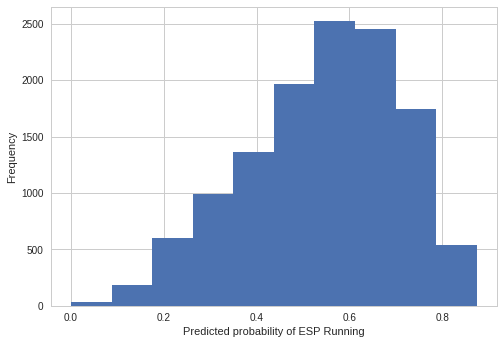

In [143]:
y_pred_prob = logreg.predict_proba(X_te_r)[:, 1]
plt.hist(y_pred_prob)
plt.xlabel('Predicted probability of ESP Running')
plt.ylabel('Frequency')

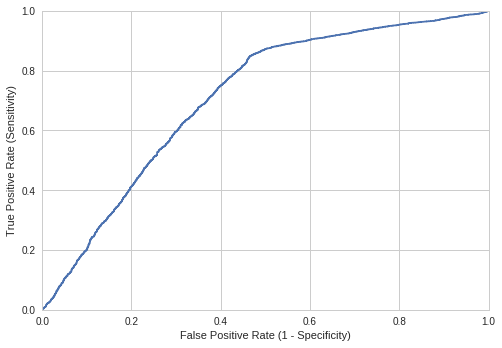

In [144]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

Seeing the ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for the particular context

Chooosing the classification threshold is a business decision

In [145]:
metrics.auc(fpr, tpr) # Area under the curve

0.71052897001077775

## Changing the threshhold

The following commands shows the impact of changing the threshold of your model

In [146]:
from sklearn.preprocessing import binarize
y_pred_class = binarize(y_pred_prob, 0.54)# change the threshold to decrease sensitivity
# moving the treshold from .50 to .54  ( > .54 give me 1 else its a 0)

/home/sprmario/Envs/testDSenv/local/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [147]:
### Orginial Matrix
##[[1367  789]
## [3145 7087]]
#
# new confusion matrix. Columns=Predicted Down/Warning, Running; Row=Actual Down/Warning, Running. 
# sensitivity = True Positive / Actual YES
# specificity = True Negative / Actual NO
print metrics.confusion_matrix(y_test[0:], y_pred_class[0])

[[1495  661]
 [4018 6214]]


In [148]:
pd.crosstab(y_test[0:], y_pred_class[0], rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0.0,1.0,All
True,,,
0,1495,661,2156
1,4018,6214,10232
All,5513,6875,12388


In [149]:
# new sensitivity
print 6457 / float(10232)

0.631059421423


In [150]:
# new specificity
print 1465 / float(2156)

0.679499072356


# RANDOM FOREST MODEL

In [151]:
feature_cols = ['esp_age','depth','Vendor 1','Vendor 2', 'Vendor 3','Ti_C','Pi_Psia','Vx_g','Vy_g','Tm_C','MOR_Ohm','Lv_V']
X = wells_df[feature_cols]
y = wells_df.two_labels

In [152]:
feature_cols = ['SIRHAN','WEST SAFAWI','perf_diff','depth','bean','esp_age','Vendor 1','Vendor 2', 'Vendor 3',
                         'water_cut','daily_flow','num_work_orders','avg_maintenance_cost_monthly','avg_uptime',
                        'daily_production_variance','Ti_C','Pi_Psia','Vx_g','Vy_g','Tm_C','MOR_Ohm','Lc_mA','Lv_V']
X = wells_df[feature_cols]
y = wells_df.two_labels

In [153]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=.20)

In [154]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score

#clf = RandomForestClassifier(n_estimators=10, max_depth=None, random_state=0, class_weight='balanced_subsample') #, min_samples_split=2
#scores = cross_val_score(clf, X_train, y_train)
#scores.mean() 

In [155]:
clf = RandomForestClassifier(max_depth=6, n_estimators=5,n_jobs=10, class_weight= 'balanced', random_state=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [156]:
print metrics.accuracy_score(y_pred, y_test)
print metrics.f1_score(y_pred, y_test)

0.701485308363
0.79487463945


In [157]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,1525,631,2156
1,3067,7165,10232
All,4592,7796,12388


In [158]:
sensitivity = (7165/10232.) * 100 #TP/(TP + FN))
print sensitivity
specificity = (1525/2156.) *100
print specificity

70.0254104769
70.73283859


In [159]:
print(classification_report(y_test, y_pred, target_names=outcome))

              precision    recall  f1-score   support

Down/Warning       0.33      0.71      0.45      2156
     Running       0.92      0.70      0.79     10232

 avg / total       0.82      0.70      0.74     12388



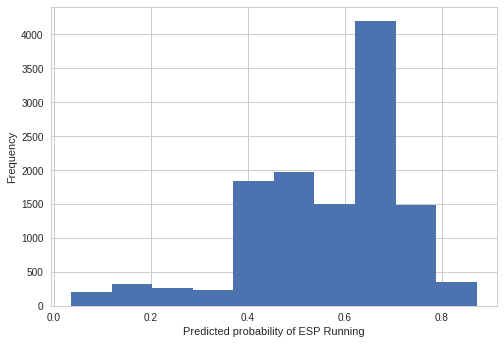

In [160]:
y_pred_prob = clf.predict_proba(X_test)[:, 1]
plt.hist(y_pred_prob)
plt.xlabel('Predicted probability of ESP Running')
plt.ylabel('Frequency')

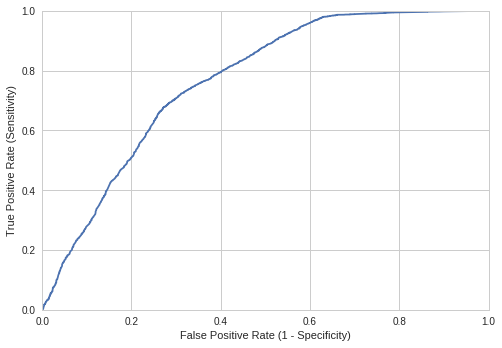

In [161]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

In [162]:
roc_auc = metrics.auc(fpr, tpr) # area under the curve
roc_auc

0.76588442657253386

## Important features for your model

In [163]:
pd.DataFrame({'feature':feature_cols, 'importance':clf.feature_importances_}).sort_values(by='importance',ascending=False)

,feature,importance
18,Vy_g,0.529580
6,Vendor 1,0.191987
8,Vendor 3,0.070899
17,Vx_g,0.042345
19,Tm_C,0.024575
20,MOR_Ohm,0.024308
7,Vendor 2,0.023811
5,esp_age,0.019423
15,Ti_C,0.019327
22,Lv_V,0.012278


## Next Steps

Oversample minority class and run both models

Use cross validation to get the best recall rate from the logistic regression and random forest models. 

For further analysis, I would use all 3 classes in a random forest model and compare it with a multiclass classification model. 

I would also try a survival analysis to analyze the time it would take for an ESP to go from ‘warning’ to ‘down’. Python offers an awesome package called lifelines.





